# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

# Cas de tests, Modele linéaire

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [6]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.17088759 0.79051924 0.97548485]


In [3]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
], dtype=ctypes.c_float)
Y = np.array([
      1,
      -1,
      -1
], dtype=ctypes.c_float)

print(type(X))
print(Y)

<class 'numpy.ndarray'>
[ 1. -1. -1.]


In [4]:
X_plot = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y_plot = np.array([
      1,
      -1,
      -1
])

In [5]:
arr_size = len(X)

In [6]:
dimension = len(X[0])

In [7]:
learning_rate = ctypes.c_float(0.001)

In [8]:
epoch = 1000000

In [9]:
X_flat = X.flatten()

In [10]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [11]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [12]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [13]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[ -335.32278 -1340.1364  -1682.8896 ]
<class 'ctypes.wintypes.LP_c_float'>


In [29]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [30]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(100* min(X_plot[:, 0]),100* max(X_plot[:, 0])) :
  for x2 in range(100*min(X_plot[:, 1]), 100*max(X_plot[:, 1])) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

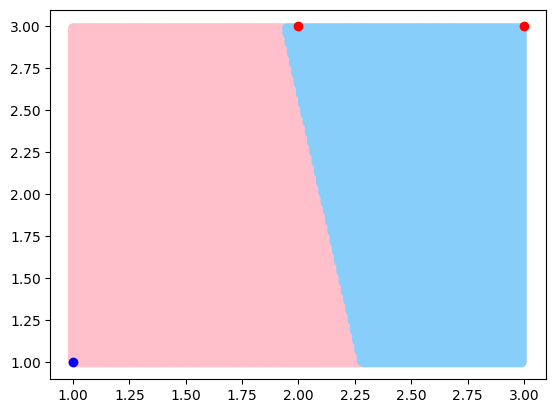

<Figure size 640x480 with 0 Axes>

In [31]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

In [17]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [18]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.45347118 0.2046771  0.1388284 ]


In [19]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])], dtype=ctypes.c_float)
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0], dtype=ctypes.c_float)

X_plot = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y_plot = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

In [20]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [21]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [22]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [23]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [24]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[ 0.34747097 -0.06333676 -0.11083758]
<class 'ctypes.wintypes.LP_c_float'>


In [25]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [26]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(100 , 300) :
  for x2 in range(100 , 300) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

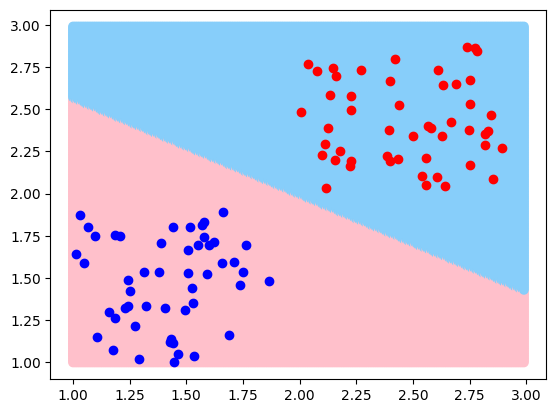

<Figure size 640x480 with 0 Axes>

In [27]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

In [28]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [29]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.27822053 0.12390649 0.6218244 ]


In [30]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]], dtype= ctypes.c_float)
Y = np.array([1, 1, -1, -1], dtype= ctypes.c_float)

X_plot = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y_plot = np.array([1, 1, -1, -1])

In [31]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [32]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [33]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [34]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [35]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[-1.7796759e-03 -9.3413983e-05  1.8252623e-03]
<class 'ctypes.wintypes.LP_c_float'>


In [36]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [37]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(0 , 100) :
  for x2 in range(0 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

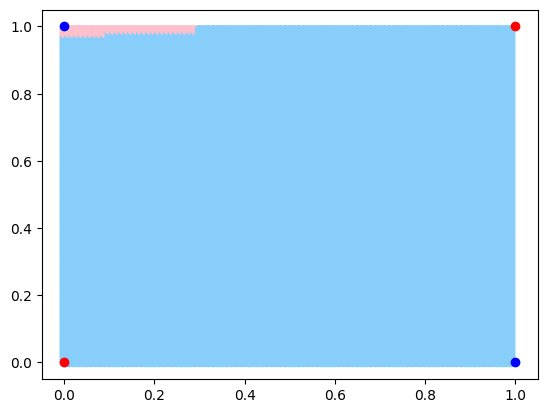

<Figure size 640x480 with 0 Axes>

In [38]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

In [39]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [42]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.26201582 0.97746575 0.21271718]


In [43]:
X = np.random.random((500, 2)) * 2.0 - 1.0
X = np.array(X, dtype= ctypes.c_float)
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])
Y = np.array(Y, dtype= ctypes.c_float)

X_plot = np.random.random((500, 2)) * 2.0 - 1.0
Y_plot = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

In [44]:
print(X)
print(Y)

[[-6.01479150e-02 -7.09398746e-01]
 [ 2.44862378e-01 -9.06936824e-01]
 [-9.20402944e-01  7.32062995e-01]
 [ 6.73015118e-01 -6.67256340e-02]
 [ 1.28763132e-02 -1.39608517e-01]
 [ 9.17923689e-01  2.26761818e-01]
 [ 7.73199201e-01  7.08513558e-01]
 [-5.07814229e-01 -5.44248462e-01]
 [ 5.85042059e-01 -6.15078330e-01]
 [ 5.71958125e-01  2.28274316e-01]
 [-6.16022885e-01 -1.24893546e-01]
 [-4.44558002e-02 -7.12048709e-01]
 [-9.46323395e-01  6.07471347e-01]
 [ 1.15674205e-01  3.57831210e-01]
 [-3.51287127e-01 -9.30560946e-01]
 [-3.49191576e-01  2.34853357e-01]
 [-2.58451290e-02 -5.03467083e-01]
 [ 4.15851802e-01 -7.15536177e-01]
 [-8.15911591e-01 -1.75821647e-01]
 [ 1.47472262e-01  5.63617706e-01]
 [ 9.65678394e-01 -6.12592459e-01]
 [ 5.03765225e-01  6.58343613e-01]
 [ 8.19894493e-01 -9.17662442e-01]
 [ 8.88466358e-01 -8.35200369e-01]
 [-8.85392129e-01 -5.70093930e-01]
 [-4.73777026e-01  1.54248491e-01]
 [-2.35686988e-01  1.55109286e-01]
 [ 4.96338755e-01  8.62761319e-01]
 [-3.77478004e-02 -5

In [45]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 1000000
X_flat = X.flatten()

In [46]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [47]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [48]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [49]:
linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)
print(trained_linear_model)
print(type(linear_model_training_ptr))

[ 0.00201564 -0.00330864 -0.00077998]
<class 'ctypes.wintypes.LP_c_float'>


In [50]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [51]:
predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

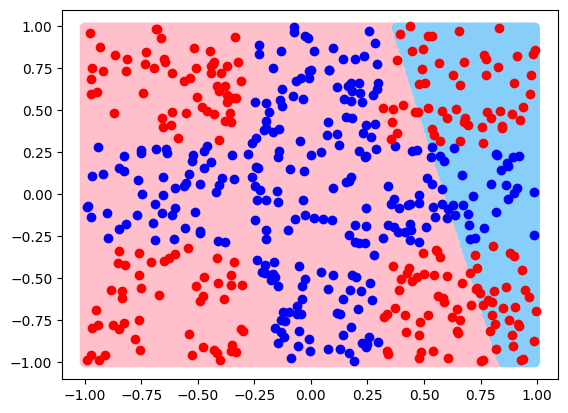

<Figure size 640x480 with 0 Axes>

In [52]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

In [19]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

ArgumentError: argument 1: <class 'TypeError'>: expected LP_c_float instance instead of int

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [107]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.45202422 0.35707748 0.00672579]


In [108]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

Y_1 = [x[0] for x in Y]
Y_2 = [x[1] for x in Y]
Y_3 = [x[2] for x in Y]


X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)
Y_1 = np.array(Y_1, dtype=ctypes.c_float)
Y_2 = np.array(Y_2, dtype=ctypes.c_float)
Y_3 = np.array(Y_3, dtype=ctypes.c_float)

X_plot = np.random.random((500, 2)) * 2.0 - 1.0
Y_plot = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [0, 0, 0]for p in X_plot])

X_plot = X_plot[[not np.all(arr == [0, 0, 0]) for arr in Y_plot]]
Y_plot = Y_plot[[not np.all(arr == [0, 0, 0]) for arr in Y_plot]]

In [109]:
print(Y_1)

[1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.

In [110]:
print(Y_2)

[0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.

In [111]:
print(X)
print(type(X))

[[-0.63467836 -0.1765466 ]
 [-0.24491446 -0.4763459 ]
 [ 0.96050173  0.5337127 ]
 [-0.52350336  0.7132396 ]
 [ 0.48904276 -0.13808036]
 [ 0.38833037 -0.1979294 ]
 [-0.3285079  -0.5925517 ]
 [-0.2839175   0.83447933]
 [ 0.33085445 -0.2545944 ]
 [-0.33229312  0.9370516 ]
 [-0.64369047  0.51757956]
 [-0.46260625 -0.8967595 ]
 [ 0.87476116 -0.8550024 ]
 [ 0.5907107   0.5126648 ]
 [ 0.8150813   0.4202513 ]
 [ 0.6851969   0.4764887 ]
 [-0.9849897  -0.40226603]
 [ 0.55312425  0.36049938]
 [ 0.5280936  -0.18521568]
 [ 0.7135166  -0.39568156]
 [ 0.9978831  -0.43558568]
 [ 0.50548905  0.27991346]
 [ 0.76939875 -0.19093536]
 [-0.6265425  -0.73931897]
 [ 0.5775603   0.9122478 ]
 [-0.20993344  0.3081051 ]
 [-0.4967964   0.37125194]
 [-0.49307477  0.4857981 ]
 [-0.55883497 -0.8681953 ]
 [ 0.33683243  0.05768922]
 [ 0.51458514  0.25512606]
 [ 0.22785887  0.6226474 ]
 [-0.65542793 -0.697592  ]
 [-0.9829181   0.9719717 ]
 [ 0.22074114  0.7530191 ]
 [ 0.43148395  0.01604961]
 [ 0.3429929   0.9034576 ]
 

In [112]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.01)
epoch = 10000000
X_flat = X.flatten()

In [113]:
print(len(X))
print(dimension)
print(learning_rate)
print(epoch)
#print(X_flat)

407
2
c_float(0.009999999776482582)
10000000


In [114]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

In [115]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_1_to_predict = (ctypes.c_float * len(Y_1))(*Y_1)
y_1_to_predict_ptr = ctypes.cast(y_1_to_predict, LP_c_float)

In [116]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_2_to_predict = (ctypes.c_float * len(Y_2))(*Y_2)
y_2_to_predict_ptr = ctypes.cast(y_2_to_predict, LP_c_float)

In [117]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_3_to_predict = (ctypes.c_float * len(Y_3))(*Y_3)
y_3_to_predict_ptr = ctypes.cast(y_3_to_predict, LP_c_float)

In [118]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]

my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [119]:
print(type(w_array_ptr))
print(type(y_1_to_predict_ptr))
print(type(x_to_predict_ptr))
print(type(arr_size))
print(type(dimension))
print(type(learning_rate))
print(type(epoch))

<class 'ctypes.wintypes.LP_c_float'>
<class 'ctypes.wintypes.LP_c_float'>
<class 'ctypes.wintypes.LP_c_float'>
<class 'int'>
<class 'int'>
<class 'ctypes.c_float'>
<class 'int'>


In [120]:
linear_model_training_ptr_1 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_1_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_1 = np.ctypeslib.as_array(
    linear_model_training_ptr_1, ((dimension + 1),)
)
print(trained_linear_model_1)
print(type(linear_model_training_ptr_1))

[-0.03797563 -0.07570478 -0.07814718]
<class 'ctypes.wintypes.LP_c_float'>


In [121]:
print(type(w_array_ptr))
print(type(y_1_to_predict_ptr))
print(type(x_to_predict_ptr))
print(type(arr_size))
print(type(dimension))
print(type(learning_rate))
print(type(epoch))

<class 'ctypes.wintypes.LP_c_float'>
<class 'ctypes.wintypes.LP_c_float'>
<class 'ctypes.wintypes.LP_c_float'>
<class 'int'>
<class 'int'>
<class 'ctypes.c_float'>
<class 'int'>


In [122]:
w_array_ptr = my_lib.generate_random_w(dimension)
w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))
linear_model_training_ptr_2 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_2_to_predict,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_2 = np.ctypeslib.as_array(
    linear_model_training_ptr_2, ((dimension + 1),)
)
print(trained_linear_model_2)
print(type(linear_model_training_ptr_2))

[0.00284238 0.00582135 0.6408431 ]
<class 'ctypes.wintypes.LP_c_float'>


In [123]:
w_array_ptr = my_lib.generate_random_w(dimension)
w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))
linear_model_training_ptr_3 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_2_to_predict,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_3 = np.ctypeslib.as_array(
    linear_model_training_ptr_3, ((dimension + 1),)
)
print(trained_linear_model_3)
print(type(linear_model_training_ptr_3))

[0.00195312 0.00559957 0.50891066]
<class 'ctypes.wintypes.LP_c_float'>


In [124]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [125]:
predicted_labels_1 = []
predicted_x1_1 = []
predicted_x2_1 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1_1.append(x1/100)
    predicted_x2_1.append(x2/100)
    if x1/100 * trained_linear_model_1[1] + x2/100 * trained_linear_model_1[2] + trained_linear_model_1[0] >= 0:
        predicted_labels_1.append('pink')
    else : predicted_labels_1.append('white')

predicted_labels_2 = []
predicted_x1_2 = []
predicted_x2_2 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1_2.append(x1/100)
    predicted_x2_2.append(x2/100)
    if x1/100 * trained_linear_model_2[1] + x2/100 * trained_linear_model_2[2] + trained_linear_model_2[0] >= 0:
        predicted_labels_2.append('green')
    else : predicted_labels_2.append('white')

predicted_labels_3 = []
predicted_x1_3 = []
predicted_x2_3 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1_3.append(x1/100)
    predicted_x2_3.append(x2/100)
    if x1/100 * trained_linear_model_3[1] + x2/100 * trained_linear_model_3[2] + trained_linear_model_3[0] >= 0:
        predicted_labels_3.append('blue')
    else : predicted_labels_3.append('white')

In [126]:
# predicted_labs = []
# predicted_x1 = []
# predicted_x2 = []
# for x1 in range(-100 , 100) :
#   for x2 in range(-100 , 100) :
#     predicted_x1.append(x1/100)
#     predicted_x2.append(x2/100)
#     if (x1/100 * trained_linear_model_1[1] + x2/100 * trained_linear_model_1[2] + trained_linear_model_1[0] >= 0)\
#             and (x1/100 * trained_linear_model_2[1] + x2/100 * trained_linear_model_2[2] + trained_linear_model_2[0] < 0)\
#             and (x1/100 * trained_linear_model_3[1] + x2/100 * trained_linear_model_3[2] + trained_linear_model_3[0] < 0):
#         predicted_labs.append('aqua')
#     elif (x1/100 * trained_linear_model_2[1] + x2/100 * trained_linear_model_2[2] + trained_linear_model_2[0] >= 0)\
#             and (x1/100 * trained_linear_model_1[1] + x2/100 * trained_linear_model_1[2] + trained_linear_model_1[0] < 0)\
#             and (x1/100 * trained_linear_model_3[1] + x2/100 * trained_linear_model_3[2] + trained_linear_model_3[0] < 0):
#         predicted_labs.append('lightcoral')
#     elif (x1/100 * trained_linear_model_3[1] + x2/100 * trained_linear_model_3[2] + trained_linear_model_3[0] >= 0)\
#             and (x1/100 * trained_linear_model_1[1] + x2/100 * trained_linear_model_1[2] + trained_linear_model_1[0] < 0)\
#             and (x1/100 * trained_linear_model_2[1] + x2/100 * trained_linear_model_2[2] + trained_linear_model_2[0] < 0):
#         predicted_labs.append('chocolate')
#     else :
#         predicted_labs.append('limegreen')

predicted_labs = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    if (x1/100 * trained_linear_model_1[1] + x2/100 * trained_linear_model_1[2] + trained_linear_model_1[0] >= 0) :
        predicted_labs.append('aqua')
    elif (x1/100 * trained_linear_model_2[1] + x2/100 * trained_linear_model_2[2] + trained_linear_model_2[0] >= 0) :
        predicted_labs.append('yellow')
    elif (x1/100 * trained_linear_model_3[1] + x2/100 * trained_linear_model_3[2] + trained_linear_model_3[0] <= 0) :
        predicted_labs.append('red')
    else :
        predicted_labs.append('magenta')

In [88]:
vec_to_predict = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
      vec_to_predict.append([x1, x2])
vec_to_predict = np.array(vec_to_predict)

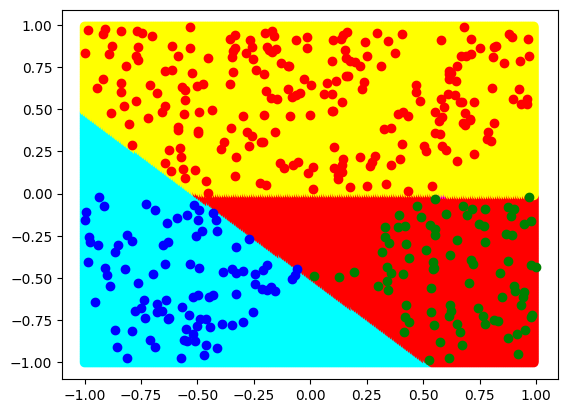

<Figure size 640x480 with 0 Axes>

In [127]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labs)
#plt.scatter((predicted_x1_1, predicted_x2_1),(predicted_x1_2, predicted_x2_2), (predicted_x1_3, predicted_x2_3), c=(predicted_labels_1,predicted_labels_2,predicted_labels_3))
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [129]:
my_lib.delete_float_array(linear_model_training_ptr_1, (dimension + 1))
my_lib.delete_float_array(linear_model_training_ptr_2, (dimension + 1))
my_lib.delete_float_array(linear_model_training_ptr_3, (dimension + 1))
del linear_model_training_ptr_1
del linear_model_training_ptr_2
del linear_model_training_ptr_3

NameError: name 'linear_model_training_ptr_1' is not defined

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [130]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

print(w_array)

[0.33626616 0.8286294  0.55455124]


In [131]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

Y_1 = [x[0] for x in Y]
Y_2 = [x[1] for x in Y]
Y_3 = [x[2] for x in Y]

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)
Y_1 = np.array(Y_1, dtype=ctypes.c_float)
Y_2 = np.array(Y_2, dtype=ctypes.c_float)
Y_3 = np.array(Y_3, dtype=ctypes.c_float)

X_plot = np.random.random((1000, 2)) * 2.0 - 1.0
Y_plot = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

In [132]:
arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.01)
epoch = 10000000
X_flat = X.flatten()

In [133]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_1_to_predict = (ctypes.c_float * len(Y_1))(*Y_1)
y_1_to_predict_ptr = ctypes.cast(y_1_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_2_to_predict = (ctypes.c_float * len(Y_2))(*Y_2)
y_2_to_predict_ptr = ctypes.cast(y_2_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_3_to_predict = (ctypes.c_float * len(Y_3))(*Y_3)
y_3_to_predict_ptr = ctypes.cast(y_3_to_predict, LP_c_float)

In [134]:
my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]

my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

In [135]:
linear_model_training_ptr_1 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_1_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_1 = np.ctypeslib.as_array(
    linear_model_training_ptr_1, ((dimension + 1),)
)
print(trained_linear_model_1)
print(type(linear_model_training_ptr_1))

[-0.00373382  0.00887338  0.01993415]
<class 'ctypes.wintypes.LP_c_float'>


In [136]:
w_array_ptr = my_lib.generate_random_w(dimension)
w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))
linear_model_training_ptr_2 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_2_to_predict,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_2 = np.ctypeslib.as_array(
    linear_model_training_ptr_2, ((dimension + 1),)
)
print(trained_linear_model_2)
print(type(linear_model_training_ptr_2))

[-0.01144559 -0.00167534 -0.01140036]
<class 'ctypes.wintypes.LP_c_float'>


In [137]:
w_array_ptr = my_lib.generate_random_w(dimension)
w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))
linear_model_training_ptr_3 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_2_to_predict,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_3 = np.ctypeslib.as_array(
    linear_model_training_ptr_3, ((dimension + 1),)
)
print(trained_linear_model_3)
print(type(linear_model_training_ptr_3))

[-0.00026947  0.01385532  0.00530849]
<class 'ctypes.wintypes.LP_c_float'>


In [138]:
my_lib.predict_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.predict_linear_model.restype = ctypes.POINTER(ctypes.c_float)

In [139]:
predicted_labs = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    if (x1/100 * trained_linear_model_1[1] + x2/100 * trained_linear_model_1[2] + trained_linear_model_1[0] >= 0) :
        predicted_labs.append('aqua')
    elif (x1/100 * trained_linear_model_2[1] + x2/100 * trained_linear_model_2[2] + trained_linear_model_2[0] >= 0) :
        predicted_labs.append('yellow')
    elif (x1/100 * trained_linear_model_3[1] + x2/100 * trained_linear_model_3[2] + trained_linear_model_3[0] <= 0) :
        predicted_labs.append('red')
    else :
        predicted_labs.append('magenta')

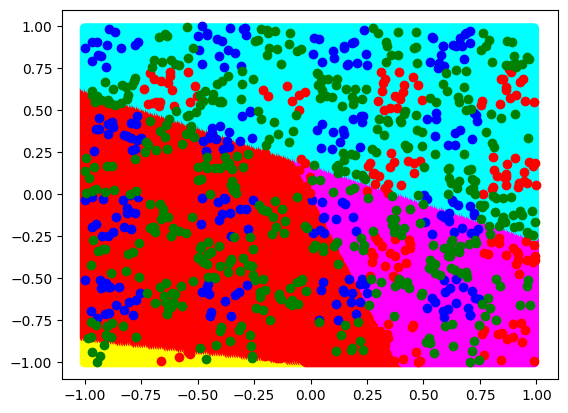

<Figure size 640x480 with 0 Axes>

In [140]:
plt.scatter(predicted_x1, predicted_x2, c=predicted_labs)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [14]:
exit()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

In [2]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

In [33]:
X = np.array([
      [1],
      [2.5]
])
Y = np.array([
      [1],
      [3]
])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)

print(X)
print(Y)

[[1. ]
 [2.5]]
[[1.]
 [3.]]


In [34]:
dimension = 1
nombre_colonnes_x = 1
nombre_lignex_x = 2
nombre_colonnes_y = 1
nombre_lignes_y = 2
X_flat = X.flatten()
Y_flat = Y.flatten()

In [35]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [36]:
my_lib.x_transpose_times_x.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]

my_lib.x_transpose_times_x.restype = ctypes.POINTER(ctypes.c_float)

In [37]:
print(X.flatten())
print(X.transpose().flatten())

[1.  2.5]
[1.  2.5]


In [38]:
x_transpose_times_x_ptr = my_lib.x_transpose_times_x(x_to_predict_ptr, nombre_lignex_x, nombre_colonnes_x)

x_transpose_times_x = np.ctypeslib.as_array(x_transpose_times_x_ptr, (nombre_colonnes_x * nombre_colonnes_x,))

print(x_transpose_times_x)

[7.25]


In [39]:
my_lib.find_w_linear_regression.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.find_w_linear_regression.restype = ctypes.POINTER(ctypes.c_float)

In [40]:
find_w_linear_regression_ptr = my_lib.find_w_linear_regression(
    x_to_predict_ptr,
    y_to_predict_ptr,
    nombre_lignex_x,
    nombre_colonnes_x,
    nombre_lignes_y,
    nombre_colonnes_y,
)
find_w_linear_regression = np.ctypeslib.as_array(
    find_w_linear_regression_ptr, ((nombre_colonnes_x*nombre_colonnes_y),)
)
print(find_w_linear_regression)
print(type(find_w_linear_regression_ptr))

[1.1724137]
<class 'ctypes.wintypes.LP_c_float'>


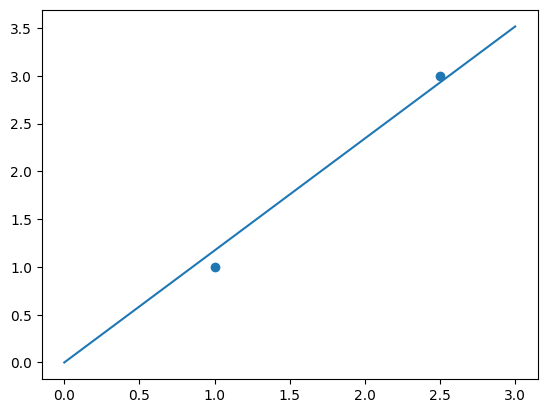

<Figure size 640x480 with 0 Axes>

In [42]:
x = np.linspace(0, 3, 100)

y = find_w_linear_regression[0] * x

plt.plot(x, y)
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [6]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      [2],
      [3],
      [4]
])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)

In [7]:
nombre_colonnes_x = 1
nombre_lignex_x = 3
nombre_colonnes_y = 1
nombre_lignes_y = 3
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
my_lib.x_transpose_times_x.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]

my_lib.x_transpose_times_x.restype = ctypes.POINTER(ctypes.c_float)
print(X.flatten())
print(X.transpose().flatten())
x_transpose_times_x_ptr = my_lib.x_transpose_times_x(x_to_predict_ptr, nombre_lignex_x, nombre_colonnes_x)

x_transpose_times_x = np.ctypeslib.as_array(x_transpose_times_x_ptr, (nombre_colonnes_x * nombre_colonnes_x,))

print(x_transpose_times_x)
my_lib.find_w_linear_regression.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.find_w_linear_regression.restype = ctypes.POINTER(ctypes.c_float)
find_w_linear_regression_ptr = my_lib.find_w_linear_regression(
    x_to_predict_ptr,
    y_to_predict_ptr,
    nombre_lignex_x,
    nombre_colonnes_x,
    nombre_lignes_y,
    nombre_colonnes_y,
)
find_w_linear_regression = np.ctypeslib.as_array(
    find_w_linear_regression_ptr, ((nombre_colonnes_x * nombre_colonnes_y),)
)
print(find_w_linear_regression)
print(type(find_w_linear_regression_ptr))

[1. 2. 3.]
[1. 2. 3.]
[14.]
[1.4285715]
<class 'ctypes.wintypes.LP_c_float'>


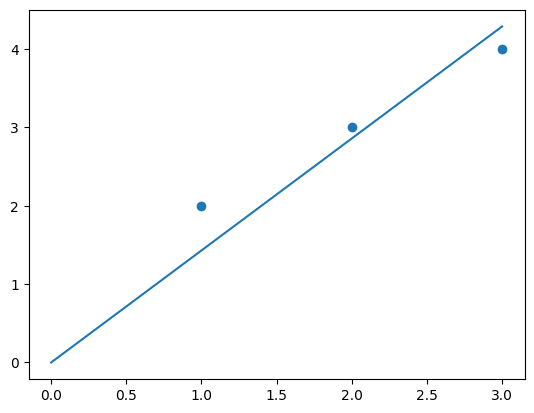

<Figure size 640x480 with 0 Axes>

In [8]:
x = np.linspace(0, 3, 100)

y = find_w_linear_regression[0] * x

plt.plot(x, y)
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [9]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      [2],
      [3],
      [2.5]
])

Y_line = np.array([2, 3, 2.5])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)
print(X)
print(X.transpose())

print(Y)

print(X.flatten())
print(X.transpose().flatten())

print(np.matmul(X.transpose(),X))

[[1. 1.]
 [2. 2.]
 [3. 1.]]
[[1. 2. 3.]
 [1. 2. 1.]]
[[2. ]
 [3. ]
 [2.5]]
[1. 1. 2. 2. 3. 1.]
[1. 2. 3. 1. 2. 1.]
[[14.  8.]
 [ 8.  6.]]


In [10]:
nombre_colonnes_x = 2
nombre_lignex_x = 3
nombre_colonnes_y = 1
nombre_lignes_y = 3
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
my_lib.x_transpose_times_x.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]

my_lib.x_transpose_times_x.restype = ctypes.POINTER(ctypes.c_float)
print(X.flatten())
print(X.transpose().flatten())
x_transpose_times_x_ptr = my_lib.x_transpose_times_x(x_to_predict_ptr, nombre_lignex_x, nombre_colonnes_x)

x_transpose_times_x = np.ctypeslib.as_array(x_transpose_times_x_ptr, (nombre_colonnes_x * nombre_colonnes_x,))

print(x_transpose_times_x)
my_lib.find_w_linear_regression.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.find_w_linear_regression.restype = ctypes.POINTER(ctypes.c_float)
find_w_linear_regression_ptr = my_lib.find_w_linear_regression(
    x_to_predict_ptr,
    y_to_predict_ptr,
    nombre_lignex_x,
    nombre_colonnes_x,
    nombre_lignes_y,
    nombre_colonnes_y,
)
find_w_linear_regression = np.ctypeslib.as_array(
    find_w_linear_regression_ptr, ((nombre_colonnes_x * nombre_colonnes_y),)
)
print(find_w_linear_regression)
print(type(find_w_linear_regression_ptr))

[1. 1. 2. 2. 3. 1.]
[1. 2. 3. 1. 2. 1.]
[14.  8.  8.  6.]
[0.45000005 1.1499997 ]
<class 'ctypes.wintypes.LP_c_float'>


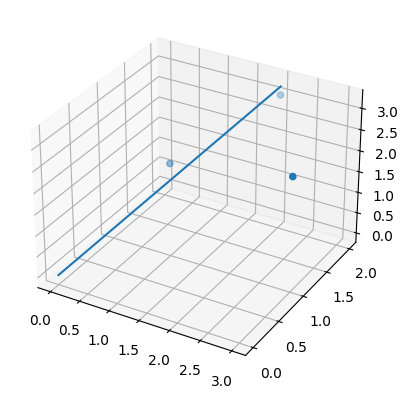

<Figure size 640x480 with 0 Axes>

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

x_1 = np.linspace(0, 2, 100)
x_2 = np.linspace(0, 2, 100)

y = find_w_linear_regression[0] * x_1 + find_w_linear_regression[1] * x_2

plt.plot(x_1, x_2, y)
ax.scatter(X[:,0],X[:,1],Y_line)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [12]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

In [12]:
print(X)
X_T = np.transpose(X)
print(X_T)

X_T_X = np.matmul(X_T,X)
print(X_T_X)

X_T_X_inv = np.linalg.inv(X_T_X)
print(X_T_X_inv)

[[1 1]
 [2 2]
 [3 3]]
[[1 2 3]
 [1 2 3]]
[[14 14]
 [14 14]]


LinAlgError: Singular matrix

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [24]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      [2],
      [1],
      [-2],
      [-1]
])

# Y_line = np.array([2, 3, 2.5])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)


In [25]:
nombre_colonnes_x = 2
nombre_lignex_x = 4
nombre_colonnes_y = 1
nombre_lignes_y = 4
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
my_lib.x_transpose_times_x.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
]

my_lib.x_transpose_times_x.restype = ctypes.POINTER(ctypes.c_float)
print(X.flatten())
print(X.transpose().flatten())
x_transpose_times_x_ptr = my_lib.x_transpose_times_x(x_to_predict_ptr, nombre_lignex_x, nombre_colonnes_x)

x_transpose_times_x = np.ctypeslib.as_array(x_transpose_times_x_ptr, (nombre_colonnes_x * nombre_colonnes_x,))

print(x_transpose_times_x)
my_lib.find_w_linear_regression.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.find_w_linear_regression.restype = ctypes.POINTER(ctypes.c_float)
find_w_linear_regression_ptr = my_lib.find_w_linear_regression(
    x_to_predict_ptr,
    y_to_predict_ptr,
    nombre_lignex_x,
    nombre_colonnes_x,
    nombre_lignes_y,
    nombre_colonnes_y,
)
find_w_linear_regression = np.ctypeslib.as_array(
    find_w_linear_regression_ptr, ((nombre_colonnes_x * nombre_colonnes_y),)
)
print(find_w_linear_regression)
print(type(find_w_linear_regression_ptr))

[1. 0. 0. 1. 1. 1. 0. 0.]
[1. 0. 1. 0. 0. 1. 1. 0.]
[2. 1. 1. 2.]
[ 0.3333333 -0.6666667]
<class 'ctypes.wintypes.LP_c_float'>


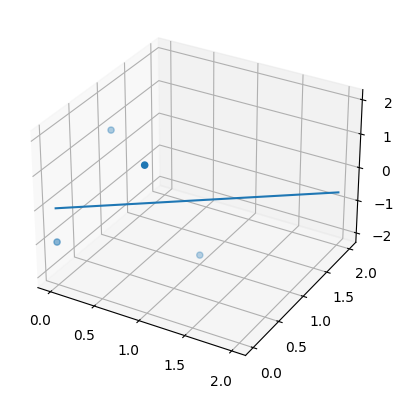

<Figure size 640x480 with 0 Axes>

In [27]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(X[:,0],X[:,1],Y)
# plt.show()
# plt.clf()


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

x_1 = np.linspace(0, 2, 100)
x_2 = np.linspace(0, 2, 100)

y = find_w_linear_regression[0] * x_1 + find_w_linear_regression[1] * x_2

plt.plot(x_1, x_2, y)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()